#Correlating CGM and Galaxy Population

In [ ]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from google.colab import drive
import os
from astropy.table import Table
import math
from scipy.ndimage import gaussian_filter
#import seaborn as sns
%matplotlib inline

In [ ]:
drive.mount('/content/drive/', force_remount=True)
path = "/content/drive/My Drive/lab Astro MAGISTRALE/Hands-on Session 4"
os.listdir(path)

Mounted at /content/drive/


['MAGG_spectra.fits', 'MAGG_LAEs.fits', 'MAGG_spectra_merged.fits']

In [ ]:
#open the file
qsolist=fits.open("/content/drive/My Drive/lab Astro MAGISTRALE/Hands-on Session 4/MAGG_spectra_merged.fits")
LAEs=fits.open("/content/drive/My Drive/lab Astro MAGISTRALE/Hands-on Session 4/MAGG_LAEs.fits")
num_qso=len(qsolist)-1
num_LAEs=len(LAEs)
print(num_qso)
print(num_LAEs)

28
2


In [ ]:
quas_name = []
quas_z = []
for exx in range(num_qso):
  #print filed name and quasar redshift
  quas_name.append(qsolist[exx+1].header["FIELD"])
  quas_z.append(qsolist[exx+1].header["z_QSO"])
  print(qsolist[exx+1].header["FIELD"])
  print(qsolist[exx+1].header["z_QSO"])

J010619.24+004823.3
4.4402
J012403.77+004432.7
3.8359
J013340.31+040059.7
4.1709
J013724.36-422417.3
3.975
J015741.56-010629.6
3.5645
J020944.61+051713.6
4.1846
J024401.84-013403.7
4.044
J033413.42-161205.4
4.38
J033900.98-013317.7
3.204
J094932.26+033531.7
4.1072
J095852.19+120245.0
3.2746
J102009.99+104002.7
3.1528
J111008.61+024458.0
4.1582
J111113.79-080402.0
3.93
J120917.93+113830.3
3.0836
J123055.57-113909.3
3.557
J124957.23-015928.8
3.6337
J133254.51+005250.6
3.5071
J142438.10+225600.7
3.634
J162116.92-004250.8
3.71
J193957.25-100241.5
3.787
J200324.14-325144.8
3.785
J205344.72-354655.2
3.49
J221527.29-161133.0
4.0
J230301.45-093930.7
3.4774
J231543.56+145606.4
3.3971
J233446.40-090812.2
3.3261
J234913.75-371259.2
4.24


In [ ]:
lae = Table.read("/content/drive/My Drive/lab Astro MAGISTRALE/Hands-on Session 4/MAGG_LAEs.fits")
print(lae)

       FIELD              z       ...          Lum                   LumErr        
------------------- ------------- ... ---------------------- ----------------------
J010619.24+004823.3      2.926344 ... 4.1721445577794756e+41  7.945311826009941e+40
J010619.24+004823.3 3.10823812893 ...  1.944294562761456e+42 1.0097005994398644e+41
J010619.24+004823.3 3.12134996922 ...  4.236641258034125e+41  9.639746500686158e+40
J010619.24+004823.3 3.20808559003 ... 1.0783381825867025e+42  8.957599905770926e+40
J010619.24+004823.3    3.21117682 ... 1.4741440601437543e+42 1.5087090345596136e+41
J010619.24+004823.3        3.2247 ...  6.807381209641117e+41  1.569898366629773e+41
J010619.24+004823.3       3.27537 ...  8.307249419444884e+41 1.6622059749643417e+41
J010619.24+004823.3        3.3267 ... 2.7016029353299648e+42  1.772353031854091e+41
J010619.24+004823.3       3.32725 ...  3.143929615799424e+42 2.8259290851745787e+41
J010619.24+004823.3        3.3276 ...  8.667358903614333e+41 1.6414110933974

**28 qusar (field) e 912 galassie totali**

In [ ]:
#FOR ALL QASARS
#NB: ogni wave[i] e flux[i] (ecc) hanno lunghezze uguali per stessa i ma diverse tra ogni i
flux_v =[]
wave_v =[]
z_qso_v =[]

for i in range(num_qso):
  wave_v.append(qsolist[i+1].data["wave"])
  z_qso_v.append(qsolist[i+1].header["z_QSO"])
  flux_v.append(qsolist[i+1].data["flux"])

print('wave_v length ',len(wave_v))
print('z_qso_v length ',len(z_qso_v))
print('flux_v length ',len(flux_v))

for j in range(len(flux_v)):
  flux_v[j]=np.array(flux_v[j])
  flux_i=np.clip(flux_v[j], 10**(-5), 1)
  flux_v[j]=flux_i

#for k in range(len(flux_v)):
#  print(flux_v[j])
#  print(len(flux_v[j]))
#  print(wave_v[k])
#  print(len(wave_v[k]))

wave_v length  28
z_qso_v length  28
flux_v length  28


In [ ]:
#FOR ALL QUASAR
z_i = []
tau_i = []
zLAEs_corr = []
R_kpc_i = []
y_zLAEs = []
Field_i = []

#NON SERVE! GIA' FATTO SOPRA
#wave_i=np.array(wave_v[0])
#for i in range(len(wave_v)):
  #wave_i=np.array(wave_v[i])
#  flux_i=np.clip(flux_v[i], 10**(-5), 1)
#print('wave of ALL field: ', wave_v, ' length: ', len(wave_v))
#print('fluxes of ALL field: ', flux_i, ' length: ', len(flux_i))

LAE = lae["z_corr"]
Field = lae["FIELD"]
R_kpc = lae["R_kpc"]

for j in range(len(Field)):
  Field_i.append(Field[j])

print('fields of LAEs: ', Field_i, '\n length: ', len(Field_i))

for i in range(len(quas_name)):
  zLAEs_tot = []
  R_kpc_tot = []
  y_zLAEs_tot = []
  for j in range(len(LAE)):
    if Field_i[j] == quas_name[i]:
      zLAEs_tot.append(LAE[j])
      R_kpc_tot.append(R_kpc[j])
      y_zLAEs_tot.append(4)
  zLAEs_corr.append(zLAEs_tot)
  R_kpc_i.append(R_kpc_tot)
  y_zLAEs.append(y_zLAEs_tot)

print('redshifts of LAEs: ', zLAEs_corr, '\n length: ', len(zLAEs_corr))
print('y of LAEs: ', y_zLAEs, '\n length: ', len(y_zLAEs))
print('R_kpc of LAEs: ', R_kpc_i, '\n length: ', len(R_kpc_i), '\n')
#OK! matrici con 28 righe, top

for i in range(len(flux_v)):
  tau = - np.log(flux_v[i])
  tau_i.append(tau)

for k in range(len(wave_v)):
  z = (wave_v[k]/1215.16)-1
  z_i.append(z)

print('\noptical depths:', tau_i, '\n length: ', len(tau_i))
#print('redshifts: ', z_i, '\n length: ', len(z_i)) ok

fields of LAEs:  ['J010619.24+004823.3', 'J010619.24+004823.3', 'J010619.24+004823.3', 'J010619.24+004823.3', 'J010619.24+004823.3', 'J010619.24+004823.3', 'J010619.24+004823.3', 'J010619.24+004823.3', 'J010619.24+004823.3', 'J010619.24+004823.3', 'J010619.24+004823.3', 'J010619.24+004823.3', 'J010619.24+004823.3', 'J010619.24+004823.3', 'J010619.24+004823.3', 'J010619.24+004823.3', 'J010619.24+004823.3', 'J010619.24+004823.3', 'J010619.24+004823.3', 'J010619.24+004823.3', 'J010619.24+004823.3', 'J010619.24+004823.3', 'J010619.24+004823.3', 'J010619.24+004823.3', 'J010619.24+004823.3', 'J010619.24+004823.3', 'J010619.24+004823.3', 'J010619.24+004823.3', 'J010619.24+004823.3', 'J010619.24+004823.3', 'J010619.24+004823.3', 'J012403.77+004432.7', 'J012403.77+004432.7', 'J012403.77+004432.7', 'J012403.77+004432.7', 'J012403.77+004432.7', 'J012403.77+004432.7', 'J012403.77+004432.7', 'J012403.77+004432.7', 'J012403.77+004432.7', 'J012403.77+004432.7', 'J012403.77+004432.7', 'J012403.77+0044

In [ ]:
#conversione di ogni redshift di ogni quasar in velocità relativa, per ogni galassia del filed
c = 3e5 # Assuming c is the speed of light in km/s
DV_gal = []

for i in range(len(zLAEs_corr)):
  DV_gal_i = []
  zLAEs_corr_vector = []
  zLAEs_corr_vector = np.array(zLAEs_corr[i])
  for k in range(len(zLAEs_corr_vector)):
    DV_gal_j = ((zLAEs_corr_vector[k] - np.array(z_i[i])) / (1 + zLAEs_corr_vector[k])) * c
    DV_gal_i.append(DV_gal_j)
  DV_gal.append(DV_gal_i)

print(len(DV_gal))
#print(DV_gal, '\n', len(DV_gal)) ok!

28


In [ ]:
#20 pixel di velocità da 50km/h l'uno (da 0 a 1000 km/h)
DV_gal_abs = []

for i in range(len(DV_gal)):
  DV_gal_abs_i = np.abs(DV_gal[i]) #ho velocità da -1000 a 1000 km/h quindi ne faccio il valore assoluto
  DV_gal_abs.append(DV_gal_abs_i)

print(len(DV_gal_abs))

28


In [ ]:
#Quello sopra forse inutile.. faccio vettore con valori giusti dei pixel delle velocità e vediamo
bin = 50
DV_pixel = []

for i in range(0,21):
  DV_pixel_i = bin*i
  DV_pixel.append(DV_pixel_i)

print(DV_pixel)

[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]


In [ ]:
#OK! PER OGNI FILED HAI M TAU E N GALASSIE, OGNUNA CON M DISTANZE!!!
for a in range(len(quas_name)):
  Rkpc_field = np.array(R_kpc_i[a])
  tau_arr_tot = np.array(tau_i[a])
  DV_field = np.array(DV_gal_abs[a])
  print(Rkpc_field, ' ', len(Rkpc_field), '\n')
  print(tau_arr_tot, ' ', len(tau_arr_tot), '\n')
  print(len(DV_field), '\n')
  for b in range(len(DV_field)):
    print(DV_field[b], ' ', len(DV_field[b]), '\n')

[157.05018382 112.40914958 242.95249842  95.60565912 159.30851706
 198.47956717 209.94822689 198.48965732 214.62208782 107.97171516
 189.50964009  82.85259805 161.4270899  121.12473299 215.78476397
 139.33313611 209.51557431 195.63175645   9.13467057  76.15715984
 227.68478628  39.24378683 179.71747309 164.67531803 150.2193084
 190.0947809  106.76308043 149.64440293  93.06052736 166.27423894
 193.01075222]   31 

[-0.         -0.         -0.         ... 11.51292546 11.1739533
 11.51292546]   26072 

31 

[107273.43519195 107253.68583459 107240.56924368 ... 338092.97217
 338102.98875309 338116.14530067]   26072 

[115806.49231456 115787.61736906 115775.08152123 ... 309841.11292847
 309850.68602274 309863.26005815]   26072 

[116392.49347274 116373.6785768  116361.18261106 ... 307900.93814722
 307910.48078524 307923.01481706]   26072 

[120176.9485945  120158.52150476 120146.2831016  ... 295371.09194207
 295380.4378905  295392.71357514]   26072 

[120308.94837261 120290.53480934 120278.3

In [ ]:
#riempio i pixel delle volocità per ogni galassia di ogni filed con i tau totali
tau_arr_field = []

for a in range(len(quas_name)): #per ogni field
  Rkpc_field = np.array(R_kpc_i[a])
  tau_arr_tot = np.array(tau_i[a])
  DV_field = np.array(DV_gal_abs[a])
  for b in range(len(DV_field)): #per ogni galassia del field
    tau_arr_field_i = []
    for c in range(len(DV_pixel)-1): #per ogni pixel
      vpixel = (DV_field[b] >= DV_pixel[c])&(DV_field[b] < DV_pixel[c+1])
      valore_tau = np.sum(tau_arr_tot[vpixel])/2
      tau_arr_field_i.append(valore_tau)
    tau_arr_field.append(tau_arr_field_i) #OK!!! 20 valori di tau (in ordine con le velocità) per ogni galassia (912)

print(tau_arr_field, '\n', len(tau_arr_field))

[[17.589643905332085, 31.135854536411205, 16.078108690826312, 12.160436373063085, 3.355541460878536, 7.1399335747676576, 1.0747948030001648, 1.4583932560220827, 3.2447882514572024, 15.076802637020656, 25.506745119904494, 8.51032567688287, 9.572549365721546, 14.245376186389393, 18.42582156782994, 7.217266306603635, 3.3658311239006786, 19.28617580720859, 14.800707570608326, 8.58605802412429], [4.279656277515565, 5.244628685600444, 4.417019500351006, 15.539825361004919, 16.929431085890553, 10.39209062744779, 14.99094786975953, 16.15846305920812, 23.910109136149913, 19.54194561016231, 23.92855702257977, 24.882102760230225, 15.526656324753228, 4.885452251681942, 5.2533444633762425, 5.528137225844951, 12.985025276638865, 11.152474793273802, 20.13242910562694, 12.016179415558675], [3.9153168682831714, 4.299075487570119, 5.733839311288417, 7.721692912783617, 3.146828769205186, 4.3340217012332465, 6.493530520166462, 13.927460532938396, 21.89905535681531, 17.811769109277684, 17.53635330652664, 1

In [ ]:
#ora la griglia

n = 28
binx = 20
biny = 7
Grid=np.zeros([biny,binx])
num_tau_in_pixel = np.zeros_like(Grid, dtype=int)

for q in range(len(quas_name)): #per ogni field
  Rkpc_field = np.array(R_kpc_i[q]) #ditanze di ogni galassia per quel field
  for a in range(len(DV_pixel)-1):
    for i in range(len(Rkpc_field)):
      # Calculate the correct bin index for R_kpc
      Rindex = int(min(math.floor(Rkpc_field[i] / 50), biny - 1))
      #print(vindex)
      # Check if the index is within bounds
      if 0 <= Rindex < biny:
        Grid[Rindex, a] += tau_arr_field[i][a]
        num_tau_in_pixel[Rindex, a] += 1
  n += 1
  num_tau_in_pixel[num_tau_in_pixel == 0] = 1

  Grid += Grid/n

  #print(Grid) OK!!
  #print(Grid/num_tau_in_pixel) OK!!

  """plt.imshow(Grid, origin='lower', extent=[0, binx*50, 0, biny*50], cmap='viridis')
  plt.xlabel("Relative Velocity (km/s)")
  plt.ylabel("Projected Distance (kpc)")
  plt.colorbar(label='tau')
  #plt.title("Grid of tau values")
  plt.show()
  plt.imshow(Grid/num_tau_in_pixel, origin='lower', extent=[0, binx*50, 0, biny*50], cmap='viridis')
  plt.xlabel("Relative Velocity (km/s)")
  plt.ylabel("Projected Distance (kpc)")
  plt.colorbar(label='tau')
  #plt.title("Grid of tau values")
  plt.show()"""

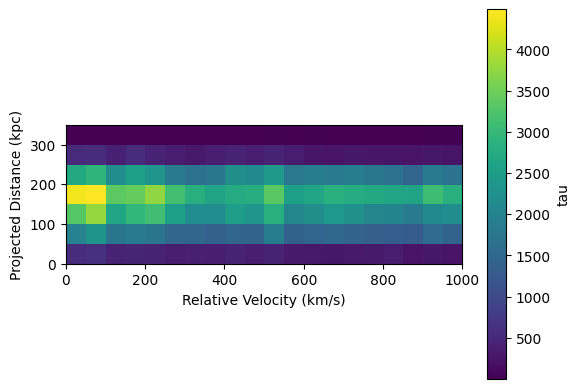

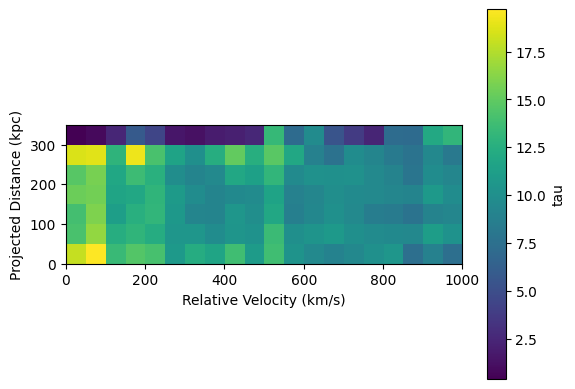

In [ ]:
plt.imshow(Grid, origin='lower', extent=[0, binx*50, 0, biny*50], cmap='viridis')
plt.xlabel("Relative Velocity (km/s)")
plt.ylabel("Projected Distance (kpc)")
plt.colorbar(label='tau')
#plt.title("Grid of tau values")
plt.show()
plt.imshow(Grid/num_tau_in_pixel, origin='lower', extent=[0, binx*50, 0, biny*50], cmap='viridis')
plt.xlabel("Relative Velocity (km/s)")
plt.ylabel("Projected Distance (kpc)")
plt.colorbar(label='tau')
#plt.title("Grid of tau values")
plt.show()

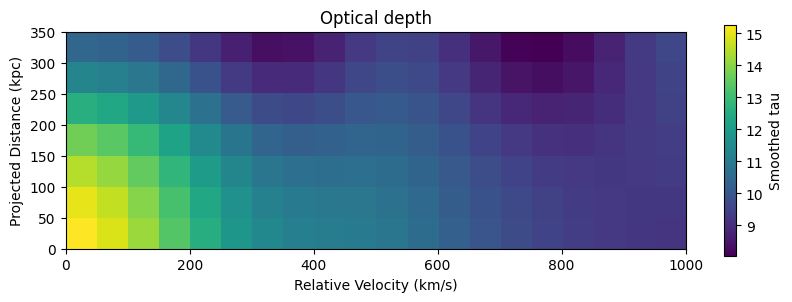

In [ ]:
from scipy.ndimage import gaussian_filter

# Apply a Gaussian filter to the Grid
sigma = 2  # Adjust the sigma value to control the amount of smoothing
smoothed_grid = gaussian_filter(Grid, sigma=sigma)
smoothed_grid_normalized = gaussian_filter(Grid / num_tau_in_pixel, sigma=sigma)

plt.figure(figsize=(10, 3))
plt.imshow(smoothed_grid_normalized, origin='lower', aspect = 'equal', extent=[0, binx*50, 0, biny*50], cmap='viridis')
plt.xlabel("Relative Velocity (km/s)")
plt.ylabel("Projected Distance (kpc)")
plt.colorbar(label='Smoothed tau')
#plt.title("Smoothed and Normalized Grid of tau values")
plt.title("Optical depth")
plt.show()